In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap
from astropy.visualization import ImageNormalize
from matplotlib import  gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

from generate_colormap import *
import cmasher as cmr



from functools import partial
import starsim

In [ ]:
#Conf file directory
conf_file_path_mps = "/home/sophie-stucki/sunsim/conf/starsim_sun_sdo_mps.conf"
conf_file_path_phoenix = "/home/sophie-stucki/sunsim/conf/starsim_sun_sdo_phoenix.conf"
conf_file_path_stagger = "/home/sophie-stucki/sunsim/conf/starsim_sun_sdo_stagger.conf"


#Path data
path_data = '/home/sophie-stucki/starsim/starsim/SDO_input/maps_2021/'
#Path for the sdo-like maps
path_grid ='/home/sophie-stucki/starsim/starsim/SDO_input/maps_2021/'

#Spectra
library = 'mps'

#Gif
gif = True

In [3]:
### SunSim simulation

if library == 'mps':
    ss=starsim.StarSim(conf_file_path=conf_file_path_mps)
elif library == 'phoenix':
    ss=starsim.StarSim(conf_file_path=conf_file_path_phoenix)
elif library == 'stagger':
    ss=starsim.StarSim(conf_file_path=conf_file_path_stagger)

ss.compute_forward(observables=['lc', 'rv'])


t = ss.obs_times

MPS-ATLAS spectra
Limb extrapolation: constant for mu <  0.1
Limb extrapolation: constant for mu <  0.1
Limb extrapolation: constant for mu <  0.1
Date 364.0. ff_ph=96.057%. ff_sp=0.070%. ff_fc=3.873%. ff_pl=0.000%. [365/365]%ELSE
ELSE
ELSE
Limb extrapolation: constant for mu <  0.1
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Spot: Add CFIST
Limb extrapolation: constant for mu <  0.1
Spot: Add CFIST
Limb extrapolation: constant for mu <  0.1
Date 364.0. ff_ph=96.057%. ff_sp=0.070%. ff_fc=3.873%. ff_pl=0.000%. [365/365]%

In [4]:
### to produce a gif with the results

plt.rcParams['font.size'] = 18

def update(frame, ax, fig, lags, scalar_map, t, rv_sim, BIS, lc, fwhm, path_grid):
    ax[0][0].cla()
    ax[0][1].cla()
    ax[0][2].cla()

    lag = lags[frame]

    color_val = scalar_map.to_rgba(rv_sim[lag])

    # Plot flux intensity
    for i in range(len(t)):
        color_val = scalar_map.to_rgba(rv_sim[i])
        ax[1][0].plot(t[i], lc[i], color=color_val, marker='.', markersize=12)
    ax[1][0].plot(t[:lag], lc[:lag], color='gray', alpha=0.2, linewidth=1)

    # Plot RVs
    for i in range(len(t)):
        color_val = scalar_map.to_rgba(rv_sim[i])
        ax[2][0].plot(t[i], rv_sim[i], color=color_val, marker='.', markersize=12)
    ax[2][0].set_ylim(rv_sim.min() - np.abs(rv_sim.min()) / 10, rv_sim.max() + np.abs(rv_sim.max()) / 10)
    ax[2][0].plot(t[:lag], rv_sim[:lag], color='gray', alpha=0.2, linewidth=1)

    # Plot BIS (mean diff)
    for i in range(len(t)):
        color_val = scalar_map.to_rgba(rv_sim[i])
        ax[3][0].plot(t[i], BIS[i], color=color_val, marker='.', linestyle='None', markersize=12)
    ax[3][0].plot(t[:lag], BIS[:lag], color='gray', alpha=0.2, linewidth=1)

    # fwhm
    for i in range(len(t)):
        color_val = scalar_map.to_rgba(rv_sim[i])
        ax[4][0].plot(t[i], fwhm[i], color=color_val, marker='.', linestyle='None', markersize=12)
    ax[4][0].plot(t[:lag], fwhm[:lag], color='gray', alpha=0.2, linewidth=1)

    # Generate stellar grid
    color_dict = ['#d95712', '#791535', '#ffd966']
    cmap = ListedColormap(color_dict)

    faculae_map = np.loadtxt(path_grid + f'faculae_map_{t[lag]:.1f}.txt')
    spot_map = np.loadtxt(path_grid + f'spot_map_{t[lag]:.1f}.txt')

    identification_map = spot_map
    identification_map[faculae_map > 0] = 2

    ax[0][0].imshow(identification_map, cmap=cmap, alpha=0.7)

    cont_map = np.loadtxt(path_grid + f'cont_map_{t[lag]:.1f}.txt')
    los_map = np.loadtxt(path_grid + f'los_map_{t[lag]:.1f}.txt')

    ax1 = ax[0][1]
    img1 = ax1.imshow(cont_map, cmap=cmr.sunburst, norm=ImageNormalize(vmin=0., vmax=1.7), alpha=0.7, interpolation='nearest', aspect='auto')

    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.48)
    fig.colorbar(img1, cax=cax1, orientation='vertical')

    ax2 = ax[0][2]
    norm = LogNorm(vmin=9e0, vmax=1.5e3)
    # ax2.imshow(cercle_array(np.shape(los_map)), cmap=ListedColormap(['#BFDBCF']), alpha=0.2)
    img2 = ax2.imshow(los_map, cmap=cmr.ocean_r, norm=norm, alpha=0.7, interpolation='nearest', aspect='auto')

    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.48)
    fig.colorbar(img2, cax=cax2, orientation='vertical', norm=norm, format="{x:.0e}")

    # Labels
    ax[1][0].set_ylabel('TSI (erg/s/cm2)')
    ax[1][0].set_xlabel('t (d)')
    ax[2][0].set_ylabel('RV (m/s)')
    ax[2][0].set_xlabel('t (d)')
    ax[3][0].set_ylabel('BIS (m/s)')
    ax[3][0].set_xlabel('t (d)')
    ax[4][0].set_ylabel('FWHM (m/s)')
    ax[4][0].set_xlabel('t (d)')

    ax[0][0].set_title('Identification Map')
    ax[0][1].set_title('Continuum')
    ax[0][2].set_title('Magnetogram')

    for i in range(3):
        ax[0][i].tick_params(axis='x', bottom=False, top=False, labelbottom=False)
        ax[0][i].tick_params(axis='y', right=False, left=False, labelleft=False)
        for spine in ax[0][i].spines.values():
            spine.set_visible(False)

    fig.tight_layout()


def retrieve_observable(ss, t, pathdata, path_grid, output):
    rv_sim = ss.results['rv']
    lc = ss.results['lc']
    BIS = ss.results['bis']
    fwhm = ss.results['fwhm']

    lags = np.arange(len(t))

    norm = Normalize(vmin=-np.max(np.abs(rv_sim)), vmax=np.max(np.abs(rv_sim)))
    List = ['#104f5c', '#2c6570', '#477b83', '#639295', '#84a8a5', '#c7b7a0', '#e49a77', '#e5845f', '#de714d', '#d3603e', '#c65031']
    colormap = get_continuous_cmap(List)
    scalar_map = ScalarMappable(norm=norm, cmap=colormap)

    fig = plt.figure(figsize=(22, 22.5))
    gs = gridspec.GridSpec(5, 4, figure=fig, height_ratios=[3.0,1.7,1.7,1.7,1.7], width_ratios=[1,1.2,1.2,0.1])

    ax = [[None]*3 for _ in range(5)]
    ax[0][0] = fig.add_subplot(gs[0, 0])
    ax[0][1] = fig.add_subplot(gs[0, 1])
    ax[0][2] = fig.add_subplot(gs[0, 2])
    ax[1][0] = fig.add_subplot(gs[1, :])
    ax[2][0] = fig.add_subplot(gs[2, :])
    ax[3][0] = fig.add_subplot(gs[3, :])
    ax[4][0] = fig.add_subplot(gs[4, :])


    ani = FuncAnimation(fig, partial(update, ax=ax, fig=fig, lags=lags, scalar_map=scalar_map, t=t, rv_sim=rv_sim, BIS=BIS, lc=lc, fwhm=fwhm, path_grid=path_grid), frames=len(lags), repeat=False)

    writer = FFMpegWriter(fps=3, metadata=dict(artist='Me'), bitrate=2400)
    ani.save(pathdata + output + '.gif', writer=writer)

In [ ]:
if gif:
    if library == 'mps':
        retrieve_observable(ss, t, path_data, path_grid, 'test_mps')
    if library == 'phoenix':
        retrieve_observable(ss, t, path_data, path_grid, 'test_phoenix')

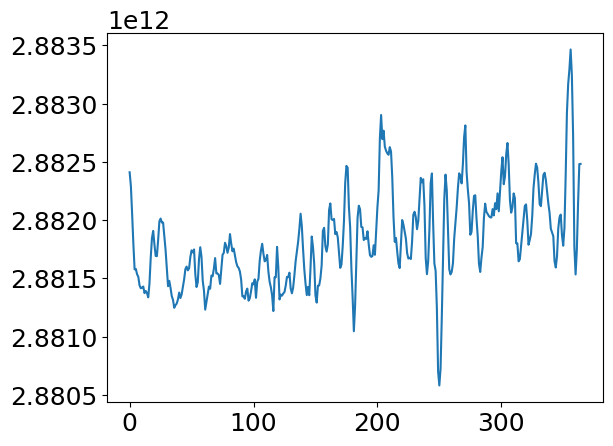

In [ ]:
### save the observables
if library == 'mps':
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/flux_test_mps.txt', ss.results['lc'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/rv_test_mps.txt', ss.results['rv'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/bis_test_mps.txt', ss.results['bis'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/fwhm_test_mps.txt', ss.results['fwhm'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/cont_test_mps.txt', ss.results['contrast'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/ccf_test_mps.txt', ss.results['CCF'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/ff_sp_test_mps.txt', ss.results['ff_sp'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/ff_fc_test_mps.txt', ss.results['ff_fc'])




elif library == 'phoenix':
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/flux_test_phoenix.txt', ss.results['lc'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/rv_test_phoenix.txt', ss.results['rv'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/bis_test_phoenix.txt', ss.results['bis'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/fwhm_test_phoenix.txt', ss.results['fwhm'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/cont_test_phoenix.txt', ss.results['contrast'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/ccf_test_phoenix.txt', ss.results['CCF'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/ff_sp_test_phoenix.txt', ss.results['ff_sp'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/ff_fc_test_phoenix.txt', ss.results['ff_fc'])

elif library == 'stagger':
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/flux_test_stagger.txt', ss.results['lc'])
    np.savetxt('/home/sophie-stucki/starsim/starsim/SDO_input/flux_output/rv_test_stagger.txt', ss.results['rv'])

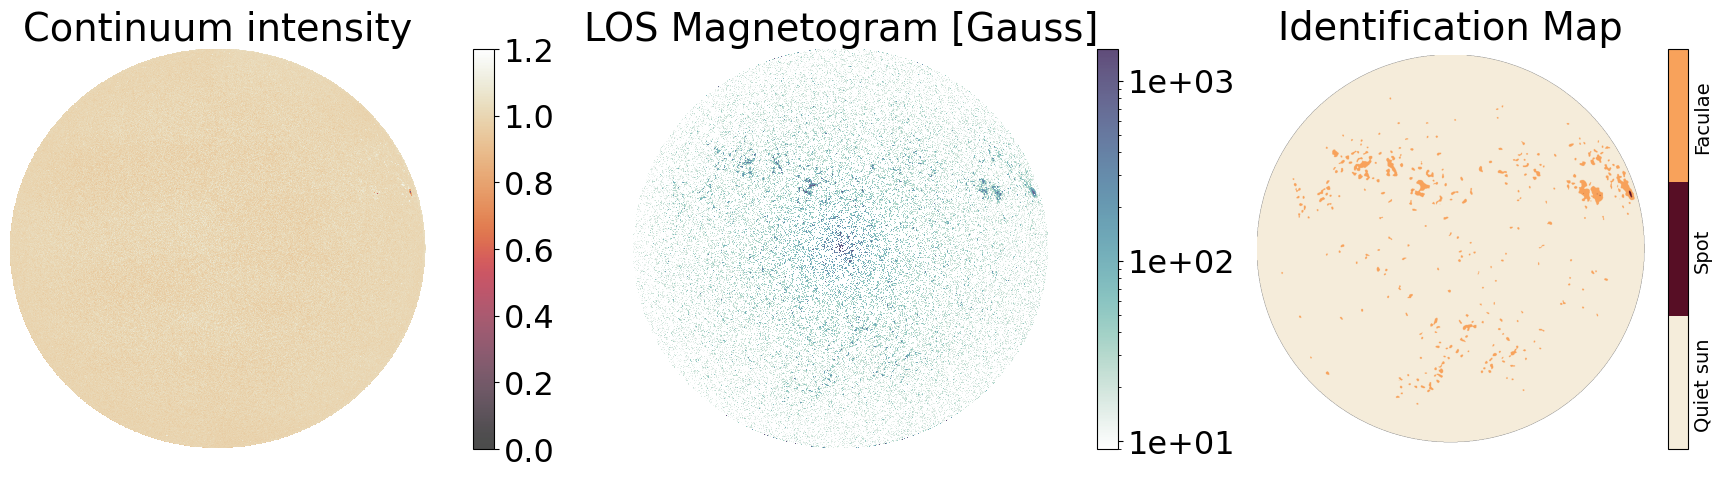

In [ ]:
### plot of the sdo images and the identification map at a given day

lag = None

if lag != None:
    plt.rcParams['font.size'] = 23

    fig, ax = plt.subplots(1,3, figsize=(18,5))
    all_colors = cmr.take_cmap_colors(cmr.torch_r,N=20)

    color_dict = [all_colors[1], "#570E25", "#f8a25b"]
    cmap = ListedColormap(color_dict)

    t = range(95)


    faculae_map = np.loadtxt(path_grid + f'faculae_map_{t[lag]:.1f}.txt')
    spot_map = np.loadtxt(path_grid + f'spot_map_{t[lag]:.1f}.txt')

    identification_map = np.copy(faculae_map)
    identification_map[identification_map > 0] = 2
    identification_map[spot_map > 0] = 1

    im = ax[2].imshow(identification_map, cmap=cmap, alpha=1)

    cont_map = np.loadtxt(path_grid + f'cont_map_{t[lag]:.1f}.txt')
    los_map = np.loadtxt(path_grid + f'los_map_{t[lag]:.1f}.txt')

    ax1 = ax[0]
    img1 = ax1.imshow(cont_map, cmap=cmr.sunburst, norm=ImageNormalize(vmin=0., vmax=1.2), alpha=0.7, interpolation='nearest', aspect='auto')

    divider1 = make_axes_locatable(ax1)
    cax1 = divider1.append_axes("right", size="5%", pad=0.48)
    fig.colorbar(img1, cax=cax1, orientation='vertical')

    ax2 = ax[1]
    norm = LogNorm(vmin=9e0, vmax=1.5e3)
    # ax2.imshow(cercle_array(np.shape(los_map)), cmap=ListedColormap(['#BFDBCF']), alpha=0.2)
    img2 = ax2.imshow(los_map, cmap=cmr.ocean_r, norm=norm, alpha=0.7, interpolation='nearest', aspect='auto')

    divider2 = make_axes_locatable(ax2)
    cax2 = divider2.append_axes("right", size="5%", pad=0.48)
    fig.colorbar(img2, cax=cax2, orientation='vertical', norm=norm, format="{x:.0e}")


    for i in range(3):
        ax[i].tick_params(axis='x', bottom=False, top=False, labelbottom=False)
        ax[i].tick_params(axis='y', right=False, left=False, labelleft=False)
        for spine in ax[i].spines.values():
            spine.set_visible(False)

    fig.tight_layout()

    cbar = plt.colorbar(im)
    yticks = [0.52, 1.07, 1.81]


    # if len(spot_locs)>0:
    #     plt.scatter(spot_locs[1], spot_locs[0], s=100, facecolors='none', edgecolors='k', alpha= 0.4)


    # add tick labels to colorbar
    cbar.set_ticks(yticks, labels=['Quiet sun', 'Spot', 'Faculae'],rotation=90, fontsize=14)
    cbar.ax.tick_params(length=0)         # remove tick lines

    ax[0].set_title('Continuum intensity')
    ax[1].set_title('LOS Magnetogram [Gauss]')
    ax[2].set_title('Identification Map', y=1.02)

    plt.savefig('/home/sophie-stucki/starsim/starsim/SDO_input/plots/sdo_id_day_{}.png'.format(lag), dpi=300, bbox_inches='tight', transparent=False)